### Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

In [ ]:
#!pip install tensorflow

In [ ]:
#!pip install keras

In [1]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
import pandas as pd

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [55]:
gas_turbine_data_Original=pd.read_csv("gas_turbines.csv")
gas_turbine_data_Original.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [57]:
gas_turbine_data_Original

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
gas_ambients=gas_turbine_data_Original[['AT','AP','AH','TEY']].copy()
gas_ambients.to_csv("gas_ambients.csv")

In [59]:
gas_turbine = numpy.loadtxt("gas_turbines.csv", delimiter=",", skiprows=1)

In [5]:
gas_ambients_data=numpy.loadtxt("gas_ambients.csv", delimiter=",", skiprows=1)

##### gas_ambients_data

In [7]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [ ]:
gas_turbine

In [12]:
# split into input (X) and output (Y) variables
X_amb = gas_ambients_data[:,0:4]
Y2_amb = gas_ambients_data[:,4]

In [13]:
X_amb

array([[0.0000e+00, 6.8594e+00, 1.0079e+03, 9.6799e+01],
       [1.0000e+00, 6.7850e+00, 1.0084e+03, 9.7118e+01],
       [2.0000e+00, 6.8977e+00, 1.0088e+03, 9.5939e+01],
       ...,
       [1.5036e+04, 7.2647e+00, 1.0063e+03, 9.9496e+01],
       [1.5037e+04, 7.0060e+00, 1.0068e+03, 9.9008e+01],
       [1.5038e+04, 6.9279e+00, 1.0072e+03, 9.7533e+01]])

In [14]:
Y2_amb

array([114.7 , 114.72, 114.71, ..., 110.19, 110.74, 111.58])

In [ ]:
# # split into input (X) and output (Y) variables
# X1 = gas_turbine[:,0:8]
# Y1 = gas_turbine[:,8]

In [ ]:
# X1

In [ ]:
# Y1

In [37]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=4,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
# Fit the model
history=model.fit(X_amb, Y2_amb, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 2s 2ms/step - loss: -470709501952.0000 - accuracy: 0.0000e+00 - val_loss: -1084698591232.0000 - val_accuracy: 0.0000e+00
Epoch 2/250
1008/1008 [==============================] - 2s 2ms/step - loss: -539605893120.0000 - accuracy: 0.0000e+00 - val_loss: -1239454580736.0000 - val_accuracy: 0.0000e+00
Epoch 3/250
1008/1008 [==============================] - 2s 2ms/step - loss: -614623215616.0000 - accuracy: 0.0000e+00 - val_loss: -1407506841600.0000 - val_accuracy: 0.0000e+00
Epoch 4/250
1008/1008 [==============================] - 2s 2ms/step - loss: -695949787136.0000 - accuracy: 0.0000e+00 - val_loss: -1589559689216.0000 - val_accuracy: 0.0000e+00
Epoch 5/250
1008/1008 [==============================] - 2s 2ms/step - loss: -783749349376.0000 - accuracy: 0.0000e+00 - val_loss: -1785468289024.0000 - val_accuracy: 0.0000e+00
Epoch 6/250
1008/1008 [==============================] - 2s 2ms/step - loss: -878327693312.0000 - accuracy: 0.

1008/1008 [==============================] - 2s 2ms/step - loss: -12907628724224.0000 - accuracy: 0.0000e+00 - val_loss: -28375362043904.0000 - val_accuracy: 0.0000e+00
Epoch 47/250
1008/1008 [==============================] - 2s 2ms/step - loss: -13480635662336.0000 - accuracy: 0.0000e+00 - val_loss: -29625390465024.0000 - val_accuracy: 0.0000e+00
Epoch 48/250
1008/1008 [==============================] - 2s 2ms/step - loss: -14069895528448.0000 - accuracy: 0.0000e+00 - val_loss: -30910405672960.0000 - val_accuracy: 0.0000e+00
Epoch 49/250
1008/1008 [==============================] - 2s 2ms/step - loss: -14676077314048.0000 - accuracy: 0.0000e+00 - val_loss: -32233737945088.0000 - val_accuracy: 0.0000e+00
Epoch 50/250
1008/1008 [==============================] - 2s 2ms/step - loss: -15298875883520.0000 - accuracy: 0.0000e+00 - val_loss: -33589638987776.0000 - val_accuracy: 0.0000e+00
Epoch 51/250
1008/1008 [==============================] - 2s 2ms/step - loss: -15937578205184.0000 - ac

1008/1008 [==============================] - 2s 2ms/step - loss: -58165655764992.0000 - accuracy: 0.0000e+00 - val_loss: -126754559623168.0000 - val_accuracy: 0.0000e+00
Epoch 92/250
1008/1008 [==============================] - 2s 2ms/step - loss: -59700796194816.0000 - accuracy: 0.0000e+00 - val_loss: -130081867431936.0000 - val_accuracy: 0.0000e+00
Epoch 93/250
1008/1008 [==============================] - 2s 2ms/step - loss: -61262390099968.0000 - accuracy: 0.0000e+00 - val_loss: -133471183831040.0000 - val_accuracy: 0.0000e+00
Epoch 94/250
1008/1008 [==============================] - 2s 2ms/step - loss: -62851813212160.0000 - accuracy: 0.0000e+00 - val_loss: -136918247407616.0000 - val_accuracy: 0.0000e+00
Epoch 95/250
1008/1008 [==============================] - 2s 2ms/step - loss: -64468990033920.0000 - accuracy: 0.0000e+00 - val_loss: -140426136780800.0000 - val_accuracy: 0.0000e+00
Epoch 96/250
1008/1008 [==============================] - 2s 2ms/step - loss: -66110699339776.0000

1008/1008 [==============================] - 2s 2ms/step - loss: -153823968493568.0000 - accuracy: 0.0000e+00 - val_loss: -333981924982784.0000 - val_accuracy: 0.0000e+00
Epoch 136/250
1008/1008 [==============================] - 2s 2ms/step - loss: -156738942664704.0000 - accuracy: 0.0000e+00 - val_loss: -340284353282048.0000 - val_accuracy: 0.0000e+00
Epoch 137/250
1008/1008 [==============================] - 2s 2ms/step - loss: -159686649184256.0000 - accuracy: 0.0000e+00 - val_loss: -346664158101504.0000 - val_accuracy: 0.0000e+00
Epoch 138/250
1008/1008 [==============================] - 2s 2ms/step - loss: -162673882824704.0000 - accuracy: 0.0000e+00 - val_loss: -353132009750528.0000 - val_accuracy: 0.0000e+00
Epoch 139/250
1008/1008 [==============================] - 2s 2ms/step - loss: -165698160558080.0000 - accuracy: 0.0000e+00 - val_loss: -359673010061312.0000 - val_accuracy: 0.0000e+00
Epoch 140/250
1008/1008 [==============================] - 2s 2ms/step - loss: -168766226

1008/1008 [==============================] - 2s 2ms/step - loss: -319535366275072.0000 - accuracy: 0.0000e+00 - val_loss: -692341815902208.0000 - val_accuracy: 0.0000e+00
Epoch 180/250
1008/1008 [==============================] - 2s 2ms/step - loss: -324265836544000.0000 - accuracy: 0.0000e+00 - val_loss: -702564710481920.0000 - val_accuracy: 0.0000e+00
Epoch 181/250
1008/1008 [==============================] - 2s 2ms/step - loss: -329039726247936.0000 - accuracy: 0.0000e+00 - val_loss: -712881087709184.0000 - val_accuracy: 0.0000e+00
Epoch 182/250
1008/1008 [==============================] - 2s 2ms/step - loss: -333860457938944.0000 - accuracy: 0.0000e+00 - val_loss: -723314569904128.0000 - val_accuracy: 0.0000e+00
Epoch 183/250
1008/1008 [==============================] - 2s 2ms/step - loss: -338729373794304.0000 - accuracy: 0.0000e+00 - val_loss: -733826166816768.0000 - val_accuracy: 0.0000e+00
Epoch 184/250
1008/1008 [==============================] - 2s 2ms/step - loss: -343644158

1008/1008 [==============================] - 2s 2ms/step - loss: -574293029158912.0000 - accuracy: 0.0000e+00 - val_loss: -1242705032118272.0000 - val_accuracy: 0.0000e+00
Epoch 224/250
1008/1008 [==============================] - 2s 2ms/step - loss: -581271277273088.0000 - accuracy: 0.0000e+00 - val_loss: -1257778890932224.0000 - val_accuracy: 0.0000e+00
Epoch 225/250
1008/1008 [==============================] - 2s 2ms/step - loss: -588311802413056.0000 - accuracy: 0.0000e+00 - val_loss: -1272981196111872.0000 - val_accuracy: 0.0000e+00
Epoch 226/250
1008/1008 [==============================] - 2s 2ms/step - loss: -595400310390784.0000 - accuracy: 0.0000e+00 - val_loss: -1288283896152064.0000 - val_accuracy: 0.0000e+00
Epoch 227/250
1008/1008 [==============================] - 2s 2ms/step - loss: -602541901479936.0000 - accuracy: 0.0000e+00 - val_loss: -1303693433503744.0000 - val_accuracy: 0.0000e+00
Epoch 228/250
1008/1008 [==============================] - 2s 2ms/step - loss: -6097

In [ ]:
# Fit the model
# model.fit(X1, Y1, validation_split=0.33, epochs=250, batch_size=10)

In [49]:
# evaluate the model
scores = model.evaluate(X_amb, Y2_amb)
print(scores)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: -1086106766409728.0000 - accuracy: 0.0000e+00
[-1086106766409728.0, 0.0]
accuracy: 0.00%


In [50]:
history.history

{'loss': [-470709501952.0,
  -539605893120.0,
  -614623215616.0,
  -695949787136.0,
  -783749349376.0,
  -878327693312.0,
  -980101955584.0,
  -1089218347008.0,
  -1205689516032.0,
  -1329908023296.0,
  -1462190997504.0,
  -1602743959552.0,
  -1751690510336.0,
  -1909372616704.0,
  -2075779530752.0,
  -2251165532160.0,
  -2435773628416.0,
  -2630416596992.0,
  -2834782224384.0,
  -3049118498816.0,
  -3273677602816.0,
  -3509136130048.0,
  -3755118166016.0,
  -4012189679616.0,
  -4280084594688.0,
  -4559752658944.0,
  -4851408306176.0,
  -5155146170368.0,
  -5470761254912.0,
  -5798484246528.0,
  -6138821607424.0,
  -6491843592192.0,
  -6858417897472.0,
  -7237903319040.0,
  -7630593982464.0,
  -8037111693312.0,
  -8457830793216.0,
  -8892688891904.0,
  -9341620977664.0,
  -9805736443904.0,
  -10284722814976.0,
  -10777731792896.0,
  -11286489333760.0,
  -11810480586752.0,
  -12350616764416.0,
  -12907628724224.0,
  -13480635662336.0,
  -14069895528448.0,
  -14676077314048.0,
  -1529887

In [52]:
# Visualize training history

# list all data in history
model.history.history.keys()

dict_keys([])

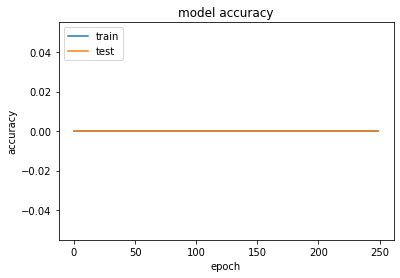

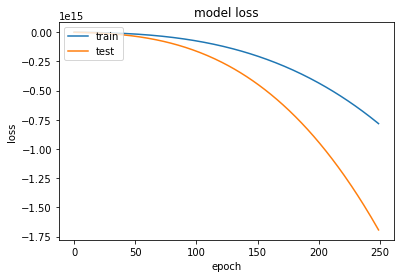

In [53]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [63]:
X_org = gas_turbine[:,0:3]
Y_org = gas_turbine[:,7]

In [64]:
X_org


array([[   6.8594, 1007.9   ,   96.799 ],
       [   6.785 , 1008.4   ,   97.118 ],
       [   6.8977, 1008.8   ,   95.939 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 ],
       [   7.006 , 1006.8   ,   99.008 ],
       [   6.9279, 1007.2   ,   97.533 ]])

In [65]:
Y_org

array([114.7 , 114.72, 114.71, ..., 110.19, 110.74, 111.58])

In [69]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=3,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [70]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
# Fit the model
history=model.fit(X_org, Y_org, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 2s 2ms/step - loss: 743.1392 - accuracy: 0.0000e+00 - val_loss: -131.4570 - val_accuracy: 0.0000e+00
Epoch 2/250
1008/1008 [==============================] - 2s 2ms/step - loss: -202.3967 - accuracy: 0.0000e+00 - val_loss: -263.4266 - val_accuracy: 0.0000e+00
Epoch 3/250
1008/1008 [==============================] - 2s 2ms/step - loss: -337.6779 - accuracy: 0.0000e+00 - val_loss: -395.3212 - val_accuracy: 0.0000e+00
Epoch 4/250
1008/1008 [==============================] - 2s 2ms/step - loss: -472.9160 - accuracy: 0.0000e+00 - val_loss: -527.1885 - val_accuracy: 0.0000e+00
Epoch 5/250
1008/1008 [==============================] - 2s 2ms/step - loss: -608.1356 - accuracy: 0.0000e+00 - val_loss: -659.0608 - val_accuracy: 0.0000e+00
Epoch 6/250
1008/1008 [==============================] - 2s 2ms/step - loss: -743.4451 - accuracy: 0.0000e+00 - val_loss: -791.0284 - val_accuracy: 0.0000e+00
Epoch 7/250
1008/1008 [========================

Epoch 52/250
1008/1008 [==============================] - 2s 2ms/step - loss: -6965.7729 - accuracy: 0.0000e+00 - val_loss: -6858.5532 - val_accuracy: 0.0000e+00
Epoch 53/250
1008/1008 [==============================] - 2s 2ms/step - loss: -7101.0244 - accuracy: 0.0000e+00 - val_loss: -6990.4673 - val_accuracy: 0.0000e+00
Epoch 54/250
1008/1008 [==============================] - 2s 2ms/step - loss: -7236.3032 - accuracy: 0.0000e+00 - val_loss: -7122.3726 - val_accuracy: 0.0000e+00
Epoch 55/250
1008/1008 [==============================] - 2s 2ms/step - loss: -7371.5459 - accuracy: 0.0000e+00 - val_loss: -7254.2544 - val_accuracy: 0.0000e+00
Epoch 56/250
1008/1008 [==============================] - 2s 2ms/step - loss: -7506.8613 - accuracy: 0.0000e+00 - val_loss: -7386.2212 - val_accuracy: 0.0000e+00
Epoch 57/250
1008/1008 [==============================] - 2s 2ms/step - loss: -7642.1519 - accuracy: 0.0000e+00 - val_loss: -7518.1245 - val_accuracy: 0.0000e+00
Epoch 58/250
1008/1008 [====

1008/1008 [==============================] - 2s 2ms/step - loss: -13729.3018 - accuracy: 0.0000e+00 - val_loss: -13453.8848 - val_accuracy: 0.0000e+00
Epoch 103/250
1008/1008 [==============================] - 2s 2ms/step - loss: -13864.5557 - accuracy: 0.0000e+00 - val_loss: -13585.7520 - val_accuracy: 0.0000e+00
Epoch 104/250
1008/1008 [==============================] - 2s 2ms/step - loss: -13999.7852 - accuracy: 0.0000e+00 - val_loss: -13717.6270 - val_accuracy: 0.0000e+00
Epoch 105/250
1008/1008 [==============================] - 2s 2ms/step - loss: -14135.0381 - accuracy: 0.0000e+00 - val_loss: -13849.5234 - val_accuracy: 0.0000e+00
Epoch 106/250
1008/1008 [==============================] - 2s 2ms/step - loss: -14270.3359 - accuracy: 0.0000e+00 - val_loss: -13981.4785 - val_accuracy: 0.0000e+00
Epoch 107/250
1008/1008 [==============================] - 2s 2ms/step - loss: -14405.5947 - accuracy: 0.0000e+00 - val_loss: -14113.3359 - val_accuracy: 0.0000e+00
Epoch 108/250
1008/1008 

Epoch 152/250
1008/1008 [==============================] - 2s 2ms/step - loss: -20492.7148 - accuracy: 0.0000e+00 - val_loss: -20049.0840 - val_accuracy: 0.0000e+00
Epoch 153/250
1008/1008 [==============================] - 2s 2ms/step - loss: -20627.9824 - accuracy: 0.0000e+00 - val_loss: -20181.0020 - val_accuracy: 0.0000e+00
Epoch 154/250
1008/1008 [==============================] - 2s 2ms/step - loss: -20763.2715 - accuracy: 0.0000e+00 - val_loss: -20312.8516 - val_accuracy: 0.0000e+00
Epoch 155/250
1008/1008 [==============================] - 3s 3ms/step - loss: -20898.5371 - accuracy: 0.0000e+00 - val_loss: -20444.8203 - val_accuracy: 0.0000e+00
Epoch 156/250
1008/1008 [==============================] - 2s 2ms/step - loss: -21033.8125 - accuracy: 0.0000e+00 - val_loss: -20576.7227 - val_accuracy: 0.0000e+00
Epoch 157/250
1008/1008 [==============================] - 2s 2ms/step - loss: -21169.0742 - accuracy: 0.0000e+00 - val_loss: -20708.6367 - val_accuracy: 0.0000e+00
Epoch 158/

1008/1008 [==============================] - 2s 2ms/step - loss: -27121.4199 - accuracy: 0.0000e+00 - val_loss: -26512.9180 - val_accuracy: 0.0000e+00
Epoch 202/250
1008/1008 [==============================] - 3s 2ms/step - loss: -27256.6738 - accuracy: 0.0000e+00 - val_loss: -26644.7793 - val_accuracy: 0.0000e+00
Epoch 203/250
1008/1008 [==============================] - 3s 3ms/step - loss: -27391.8926 - accuracy: 0.0000e+00 - val_loss: -26776.6875 - val_accuracy: 0.0000e+00
Epoch 204/250
1008/1008 [==============================] - 2s 2ms/step - loss: -27527.1836 - accuracy: 0.0000e+00 - val_loss: -26908.6289 - val_accuracy: 0.0000e+00
Epoch 205/250
1008/1008 [==============================] - 2s 2ms/step - loss: -27662.4785 - accuracy: 0.0000e+00 - val_loss: -27040.4922 - val_accuracy: 0.0000e+00
Epoch 206/250
1008/1008 [==============================] - 2s 2ms/step - loss: -27797.7676 - accuracy: 0.0000e+00 - val_loss: -27172.4590 - val_accuracy: 0.0000e+00
Epoch 207/250
1008/1008 

In [72]:
# evaluate the model
scores = model.evaluate(X_amb, Y2_amb)
print(scores)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_6/dense_18/Relu' defined at (most recent call last):
    File "C:\Users\DELL\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\DELL\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\DELL\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\DELL\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\DELL\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\DELL\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\DELL\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\DELL\AppData\Local\Temp/ipykernel_240/2347671958.py", line 2, in <module>
      scores = model.evaluate(X_amb, Y2_amb)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\training.py", line 1756, in evaluate
      tmp_logs = self.test_function(iterator)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\training.py", line 1557, in test_function
      return step_function(self, iterator)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\training.py", line 1546, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\training.py", line 1535, in run_step
      outputs = model.test_step(data)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\training.py", line 1499, in test_step
      y_pred = self(x, training=False)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\layers\core\dense.py", line 235, in call
      outputs = self.activation(outputs)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\activations.py", line 311, in relu
      return backend.relu(x, alpha=alpha, max_value=max_value, threshold=threshold)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\backend.py", line 4992, in relu
      x = tf.nn.relu(x)
Node: 'sequential_6/dense_18/Relu'
Matrix size-incompatible: In[0]: [32,4], In[1]: [3,12]
	 [[{{node sequential_6/dense_18/Relu}}]] [Op:__inference_test_function_4485949]